<a href="https://colab.research.google.com/github/jmmiddour/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/module3-join-and-reshape-data/LS_DS_113_Join_and_Reshape_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 3*

---

# Join and Reshape datasets

Objectives
- concatenate data with pandas
- merge data with pandas
-  understand tidy data formatting
-  melt and pivot data with pandas

Links
- [Pandas Cheat Sheet](https://github.com/pandas-dev/pandas/blob/master/doc/cheatsheet/Pandas_Cheat_Sheet.pdf)
- [Tidy Data](https://en.wikipedia.org/wiki/Tidy_data)
  - Combine Data Sets: Standard Joins
  - Tidy Data
  - Reshaping Data
- Python Data Science Handbook
  - [Chapter 3.6](https://jakevdp.github.io/PythonDataScienceHandbook/03.06-concat-and-append.html), Combining Datasets: Concat and Append
  - [Chapter 3.7](https://jakevdp.github.io/PythonDataScienceHandbook/03.07-merge-and-join.html), Combining Datasets: Merge and Join
  - [Chapter 3.8](https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html), Aggregation and Grouping
  - [Chapter 3.9](https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html), Pivot Tables
  
Reference
- Pandas Documentation: [Reshaping and Pivot Tables](https://pandas.pydata.org/pandas-docs/stable/reshaping.html)
- Modern Pandas, Part 5: [Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [1]:
!wget https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz

--2020-05-13 23:34:26--  https://s3.amazonaws.com/instacart-datasets/instacart_online_grocery_shopping_2017_05_01.tar.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.217.44.30
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.217.44.30|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 205548478 (196M) [application/x-gzip]
Saving to: ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’

instacart_online_gr 100%[===================>] 196.03M  66.3MB/s    in 3.0s    

2020-05-13 23:34:29 (66.3 MB/s) - ‘instacart_online_grocery_shopping_2017_05_01.tar.gz.2’ saved [205548478/205548478]



In [2]:
!tar --gunzip --extract --verbose --file=instacart_online_grocery_shopping_2017_05_01.tar.gz

instacart_2017_05_01/
instacart_2017_05_01/._aisles.csv
instacart_2017_05_01/aisles.csv
instacart_2017_05_01/._departments.csv
instacart_2017_05_01/departments.csv
instacart_2017_05_01/._order_products__prior.csv
instacart_2017_05_01/order_products__prior.csv
instacart_2017_05_01/._order_products__train.csv
instacart_2017_05_01/order_products__train.csv
instacart_2017_05_01/._orders.csv
instacart_2017_05_01/orders.csv
instacart_2017_05_01/._products.csv
instacart_2017_05_01/products.csv


In [3]:
%cd instacart_2017_05_01

/content/instacart_2017_05_01


In [4]:
!ls -lh *.csv

-rw-r--r-- 1 502 staff 2.6K May  2  2017 aisles.csv
-rw-r--r-- 1 502 staff  270 May  2  2017 departments.csv
-rw-r--r-- 1 502 staff 551M May  2  2017 order_products__prior.csv
-rw-r--r-- 1 502 staff  24M May  2  2017 order_products__train.csv
-rw-r--r-- 1 502 staff 104M May  2  2017 orders.csv
-rw-r--r-- 1 502 staff 2.1M May  2  2017 products.csv


# Assignment

## Join Data Practice

These are the top 10 most frequently ordered products. How many times was each ordered? 

1. Banana
2. Bag of Organic Bananas
3. Organic Strawberries
4. Organic Baby Spinach 
5. Organic Hass Avocado
6. Organic Avocado
7. Large Lemon 
8. Strawberries
9. Limes 
10. Organic Whole Milk

First, write down which columns you need and which dataframes have them.

Next, merge these into a single dataframe.

Then, use pandas functions from the previous lesson to get the counts of the top 10 most frequently ordered products.

## Part 1: Join Data Practice

In [5]:
# Import libraries I need to complete the assignment:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


#### Read files
First need to read the files to find out which one(s) have the data I need.

In [6]:
# Read in the aisles file.
# Nothing here that I need.
pd.read_csv('aisles.csv').sample(5)

,aisle_id,aisle
6,7,packaged meat
60,61,cookies cakes
105,106,hot dogs bacon sausage
28,29,honeys syrups nectars
40,41,cat food care


In [7]:
# Read in the departments file. 
# Nothing here that I need.
pd.read_csv('departments.csv').sample(5)

,department_id,department
4,5,alcohol
0,1,frozen
1,2,other
16,17,household
6,7,beverages


In [8]:
# Read in the order products prior(test) file.
# This does have product id and reordered.
prior = pd.read_csv('order_products__prior.csv')
prior.sample(5)

,order_id,product_id,add_to_cart_order,reordered
20237335,2134601,44375,6,0
10244822,1081627,27695,5,1
18946937,1998282,11140,26,1
26713273,2816938,20114,8,0
18794529,1982280,20580,14,1


In [9]:
# Read in the order products train file.
# This does have product id and reordered just like the prior file does. 
# Will need to concat this with the prior file.
train = pd.read_csv('order_products__train.csv')
train.sample(5)

,order_id,product_id,add_to_cart_order,reordered
5302,12950,5337,27,0
257517,628264,1862,3,1
833496,2054400,10749,10,1
862875,2128760,40706,4,1
582998,1433357,29095,7,1


In [10]:
# Read in the orders file.
# Nothing here that I need.
pd.read_csv('orders.csv').sample(5)

,order_id,user_id,eval_set,order_number,order_dow,order_hour_of_day,days_since_prior_order
859405,2314746,51625,prior,9,1,8,4.0
566090,898572,34097,test,4,0,12,30.0
2750618,1629263,165766,prior,10,0,16,10.0
450012,2866868,27086,prior,3,2,8,22.0
2518157,3237510,151569,prior,25,2,12,3.0


In [11]:
# Read in the products file.
# This does have product id and product name.
products = pd.read_csv('products.csv')
products.sample(5)

,product_id,product_name,aisle_id,department_id
48665,48666,Mild Thin Sliced Cheddar Cheese,21,16
40280,40281,Peanut Butter & Chocolate Muddy Buddies Chex Mix,125,19
32260,32261,Everyday Assorted Heavy Duty Flatware Dishwash...,111,17
1,2,All-Seasons Salt,104,13
38556,38557,Citrus Mandarins Organic,24,4


#### Filter the Products
Need to filter the products file first to find out what the product ids are for the products I need.

From the product file I need to filter out:

- product_id
- product_name

In [12]:
# Filter out just the columns I need:
cols = ['product_id', 'product_name']
products = products[cols]
products.sample(5)

,product_id,product_name
19275,19276,Whole Nutmeg
14812,14813,"Organic Stage 2 Banana, Carrot & Cranberry"
10481,10482,Beyond Chicken Lightly Seasoned Strips
36711,36712,Robust Extra Virgin Olive Oil
39628,39629,Your Life Multi Prenatal Softgels


In [0]:
# Create a list of the values I need:
prod_name = ['Banana', 'Bag of Organic Bananas', 'Organic Strawberries', 
             'Organic Baby Spinach', 'Organic Hass Avocado', 'Organic Avocado',
             'Large Lemon', 'Strawberries', 'Limes', 'Organic Whole Milk', ]

In [14]:
# Subset the products dataframe to only the ones I need:
con = products['product_name'].isin(prod_name)

# Show the shape before applying the condition for a comparison:
print (products.shape)

# Apply the condition:
products = products[con]

# Show the new shape and dataframe to check my work:
print (products.shape)
products

(49688, 2)
(10, 2)


,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries
21902,21903,Organic Baby Spinach
24851,24852,Banana
26208,26209,Limes
27844,27845,Organic Whole Milk
47208,47209,Organic Hass Avocado
47625,47626,Large Lemon
47765,47766,Organic Avocado


#### Concatenate prior(test) and train
Need to concat the prior and train files for order products because I want all the row of both files in the same dataframe. They both have identical columns. Therefore, conatenating would be better then merging for this process.

In [15]:
# Check the shape on both files:
print (prior.shape)
print (train.shape)

(32434489, 4)
(1384617, 4)


In [16]:
# Concat them together:
order_products = pd.concat([prior, train], axis=0)
order_products.shape

(33819106, 4)

In [17]:
# Want to check my work by showing the first 5 of the new dataset:
order_products.head()

,order_id,product_id,add_to_cart_order,reordered
0,2,33120,1,1
1,2,28985,2,1
2,2,9327,3,0
3,2,45918,4,1
4,2,30035,5,0


#### Filter the Order Products
Need to filter my new order products datasest to what I need.

From the concatinated order products file I need to filter out:
- product_id
- add_to_cart_order
- reordered

Also need to filter the rows based on the product_id shown for the products I need from my filtered products dataset.

In [18]:
# First need to filter out only the columns that I need:
cols2 = ['product_id', 'add_to_cart_order', 'reordered']
order_products = order_products[cols2]
order_products.head()

,product_id,add_to_cart_order,reordered
0,33120,1,1
1,28985,2,1
2,9327,3,0
3,45918,4,1
4,30035,5,0


In [0]:
# Create a list of only the values I need:
prod_id = [13176, 16797, 21137, 21903, 24852, 26209, 27845, 47209, 47626, 47766]

In [20]:
# Now need subset the new dataframe to only the rows I need:
con2 = order_products['product_id'].isin(prod_id)

# Show the shape before applying the condition for a comparison:
print (order_products.shape)

# Apply the condition:
order_products = order_products[con2]

# Show the new shape and dataframe to check my work:
print (order_products.shape)
order_products.sample(10)

(33819106, 3)
(2418314, 3)


,product_id,add_to_cart_order,reordered
27183921,13176,6,1
8890138,13176,6,1
6745325,27845,5,1
11493662,21137,18,1
6785372,13176,5,1
3881659,24852,1,1
7618636,47209,6,1
7573409,13176,6,1
20355097,24852,1,1
29486794,27845,3,1


In [21]:
# Check my work to verify I only have the product ids that I need now:
order_products['product_id'].value_counts()

24852    491291
13176    394930
21137    275577
21903    251705
47209    220877
47766    184224
47626    160792
16797    149445
26209    146660
27845    142813
Name: product_id, dtype: int64

#### Merge the Datasets
Need to merge my new filtered datasets together.

In [22]:
# Show the shape and first 3 rows of the new products dataset to find the 
#   common key:
print (products.shape)
products.head(3)

(10, 2)


,product_id,product_name
13175,13176,Bag of Organic Bananas
16796,16797,Strawberries
21136,21137,Organic Strawberries


In [23]:
# Show the shape and first 3 rows of the new order_products dataset to find the
#   common key:
print (order_products.shape)
order_products.head(3)

(2418314, 3)


,product_id,add_to_cart_order,reordered
12,21903,4,1
30,13176,1,1
51,47209,22,0


In [24]:
# Need to merge the datasets on the common key which is product_id:
products_ordered = pd.merge(products, order_products, on='product_id', how='outer')
products_ordered.head(10)

,product_id,product_name,add_to_cart_order,reordered
0,13176,Bag of Organic Bananas,1,1
1,13176,Bag of Organic Bananas,1,1
2,13176,Bag of Organic Bananas,3,1
3,13176,Bag of Organic Bananas,3,1
4,13176,Bag of Organic Bananas,3,1
5,13176,Bag of Organic Bananas,6,1
6,13176,Bag of Organic Bananas,4,1
7,13176,Bag of Organic Bananas,5,1
8,13176,Bag of Organic Bananas,1,1
9,13176,Bag of Organic Bananas,1,1


In [25]:
# I want to rename the columns to give it a cleaner look:
products_ordered.rename(columns={'product_id':'Product Id',
                                 'product_name':'Product Name',
                                 'add_to_cart_order':'Ordered',
                                 'reordered':'Reordered'},
                        inplace=True)
products_ordered.head() 

,Product Id,Product Name,Ordered,Reordered
0,13176,Bag of Organic Bananas,1,1
1,13176,Bag of Organic Bananas,1,1
2,13176,Bag of Organic Bananas,3,1
3,13176,Bag of Organic Bananas,3,1
4,13176,Bag of Organic Bananas,3,1


In [26]:
# Need to add the Ordered and Reordered columns together to get total ordered:
sum_col = products_ordered['Ordered'] + products_ordered['Reordered']
products_ordered['Total'] = sum_col
products_ordered.head()

,Product Id,Product Name,Ordered,Reordered,Total
0,13176,Bag of Organic Bananas,1,1,2
1,13176,Bag of Organic Bananas,1,1,2
2,13176,Bag of Organic Bananas,3,1,4
3,13176,Bag of Organic Bananas,3,1,4
4,13176,Bag of Organic Bananas,3,1,4


In [27]:
# Check for missing values in Product Name:
products_ordered['Product Name'].isnull().sum()

0

In [28]:
# Check for missing values in Total:
products_ordered['Total'].isnull().sum()

0

In [29]:
# Get the value counts of each product:
products_ordered['Product Name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: Product Name, dtype: int64

In [30]:
# Get the total of all values in the Total column to see how many products were 
#   order all together.
products_ordered['Total'].sum()

17263512

In [31]:
# Shows me how many values are in the Product Name column.
products_ordered['Product Name'].value_counts().sum()

2418314

In [0]:
# Since I have already created a new column that has the total of the 2 columns,
#   I can now drop those columns to reduce the size of my table.
products_ordered = products_ordered.drop(['Ordered', 'Reordered'], axis=1)

In [33]:
# Check my work to make sure my unneeded columns were dropped:
products_ordered.sample(10)

,Product Id,Product Name,Total
803537,21137,Organic Strawberries,5
2101261,47626,Large Lemon,11
2379308,47766,Organic Avocado,8
528438,16797,Strawberries,4
1668186,26209,Limes,10
2269108,47766,Organic Avocado,9
232422,13176,Bag of Organic Bananas,9
1261486,24852,Banana,14
2132442,47626,Large Lemon,26
1013770,21903,Organic Baby Spinach,4


In [34]:
# Shows how many times each product name appears in the column of the dataset.
products_ordered['Product Name'].value_counts()

Banana                    491291
Bag of Organic Bananas    394930
Organic Strawberries      275577
Organic Baby Spinach      251705
Organic Hass Avocado      220877
Organic Avocado           184224
Large Lemon               160792
Strawberries              149445
Limes                     146660
Organic Whole Milk        142813
Name: Product Name, dtype: int64

In [0]:
# Creating a condition to group all of the same products into one row.
name = products_ordered.groupby('Product Name')

In [0]:
# Assign variables to each product and get the total of the Total column for
#   each product individually.
ban_tot = name.get_group('Banana')['Total'].sum()
oban_tot = name.get_group('Bag of Organic Bananas')['Total'].sum()
ostraw_tot = name.get_group('Organic Strawberries')['Total'].sum()
ospin_tot = name.get_group('Organic Baby Spinach')['Total'].sum()
ohav_tot = name.get_group('Organic Hass Avocado')['Total'].sum()
oav_tot = name.get_group('Organic Avocado')['Total'].sum()
lem_tot = name.get_group('Large Lemon')['Total'].sum()
straw_tot = name.get_group('Strawberries')['Total'].sum()
lime_tot = name.get_group('Limes')['Total'].sum()
milk_tot = name.get_group('Organic Whole Milk')['Total'].sum()

In [37]:
# Checking my work:
print ('Bananas', ban_tot)
print ('Bag of Organic Bananas', oban_tot)
print ('Organic Strawberries', ostraw_tot)
print ('Organic Baby Spinach', ospin_tot)
print ('Organic Hass Avocado', ohav_tot)
print ('Organic Avocado', oav_tot)
print ('Large Lemon', lem_tot)
print ('Strawberries', straw_tot)
print ('Limes', lime_tot)
print ('Organic Whole Milk', milk_tot)

Bananas 2820830
Bag of Organic Bananas 2336671
Organic Strawberries 2220447
Organic Baby Spinach 2065562
Organic Hass Avocado 1674060
Organic Avocado 1327324
Large Lemon 1391185
Strawberries 1170165
Limes 1361018
Organic Whole Milk 896250


In [0]:
# Create a new dataframe with my new variables:
total_orders = pd.DataFrame(
    [['Bananas', ban_tot],
      ['Bag of Organic Bananas', oban_tot],
      ['Organic Strawberries', ostraw_tot],
      ['Organic Baby Spinach', ospin_tot],
      ['Organic Hass Avocado', ohav_tot],
      ['Organic Avocado', oav_tot],
      ['Large Lemon', lem_tot],
      ['Strawberries', straw_tot],
      ['Limes', lime_tot],
      ['Organic Whole Milk', milk_tot]],
      columns=['Product Name', 'Total Orders'])

In [39]:
# Checking my work:
total_orders

,Product Name,Total Orders
0,Bananas,2820830
1,Bag of Organic Bananas,2336671
2,Organic Strawberries,2220447
3,Organic Baby Spinach,2065562
4,Organic Hass Avocado,1674060
5,Organic Avocado,1327324
6,Large Lemon,1391185
7,Strawberries,1170165
8,Limes,1361018
9,Organic Whole Milk,896250


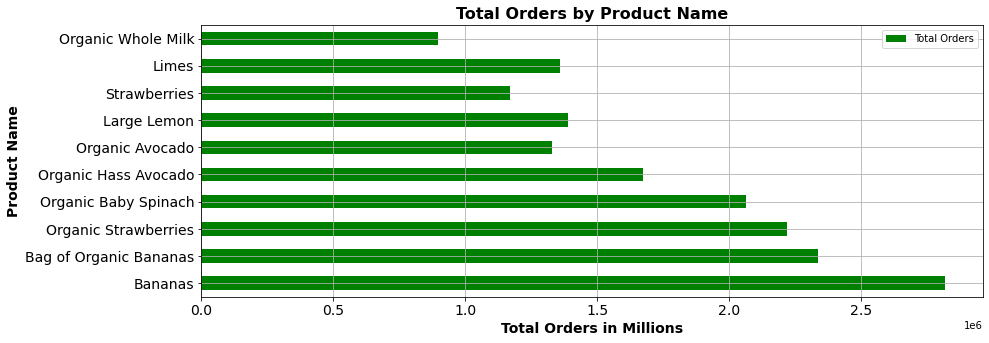

In [40]:
# Create a visualization of my new dataframe:
total_orders.plot('Product Name', 'Total Orders', kind='barh', figsize=(14,5),
                  grid=True, color='green')
plt.ylabel('Product Name', fontsize=14, fontweight='bold')
plt.xlabel('Total Orders in Millions', fontsize=14, fontweight='bold')
plt.title('Total Orders by Product Name', fontsize=16, fontweight='bold')
plt.tick_params(labelsize=14, direction='out');

## Part 2: Reshape Data Section

- Replicate the lesson code. Remember, if you haven't followed along typing out what we did during lecture, do that now to get more repetition with the syntax.
- Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:
 - Table 2 --> Tidy
 - Tidy --> Table 2
- Load seaborn's `flights` dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

##### Replicate the Lesson on the Wide vs Tidy Tables


In [0]:
# Table1 --> tidy:
# Let's create a simple table.

myindex=['John Smith', 'Jane Doe', 'Mary Johnson']
mycolumns=['treatmenta', 'treatmentb']

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16, 11],
     [3,1]],
     index=myindex,
     columns=mycolumns
)

In [42]:
# This is an example of wide format:
table1

,treatmenta,treatmentb
John Smith,NaN,2
Jane Doe,16.0,11
Mary Johnson,3.0,1


In [43]:
# Exactly the same information can be displayed by transposing the table using
#   the .T notation.
# (this is also another form of 'wide' format)
table2 = table1.T
table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


Table 3 is an example of 'tidy' format. It reorganises Table 1  to make the values, variables and obserations more clear.

Table 3 is the 'tidy' version of Table 1. Each row represents an observation, the result of one treatment on one person, and each column is a variable."

| name         | trt | result |
|--------------|-----|--------|
| John Smith   | a   | -      |
| Jane Doe     | a   | 16     |
| Mary Johnson | a   | 3      |
| John Smith   | b   | 2      |
| Jane Doe     | b   | 11     |
| Mary Johnson | b   | 1      |

In [44]:
# We can use the `melt` function to reshape table1 into tidy format.
# First, get the column names as a list:
cols = table1.columns.to_list()
cols

['treatmenta', 'treatmentb']

In [45]:
# Now get the index values as another list.
names = table1.index.tolist()
names

['John Smith', 'Jane Doe', 'Mary Johnson']

In [46]:
# For table 1, convert the index into a column using the `reset_index` method.
table1 = table1.reset_index()
table1

,index,treatmenta,treatmentb
0,John Smith,NaN,2
1,Jane Doe,16.0,11
2,Mary Johnson,3.0,1


In [47]:
# Convert the table from 'wide' to 'tidy' format using the `melt` method.
tidy1 = table1.melt(id_vars='index', value_vars=['treatmenta', 'treatmentb'])
# tidy1 = table1.melt(id_vars='index', value_vars=cols)
tidy1
# Under the index you will notice there are some repeat name and that is common
#   in the tidy format. 

,index,variable,value
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [48]:
# rename the columns
tidy1 = tidy1.rename(columns={
    'index':'name',
    'variable':'trt',
    'value':'result'
})
tidy1

,name,trt,result
0,John Smith,treatmenta,NaN
1,Jane Doe,treatmenta,16.0
2,Mary Johnson,treatmenta,3.0
3,John Smith,treatmentb,2.0
4,Jane Doe,treatmentb,11.0
5,Mary Johnson,treatmentb,1.0


In [49]:
# shorten the `trt` values
tidy1['trt'] = tidy1['trt'].str.replace('treatment', '')
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [50]:
# Tidy --> table1:
# First let's call back our tidy1 table and review how it is formatted:
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


In [51]:
# Let's do it all in reverse.
wide1 = tidy1.pivot_table(index='name',
                          columns='trt',
                          values='result')
wide1

trt,a,b
name,,
Jane Doe,16.0,11.0
John Smith,NaN,2.0
Mary Johnson,3.0,1.0


In [52]:
# Use .index to see what the index variable is named:
# To clean up the above wide table you can take name out.
wide1 = tidy1.pivot_table(index='name',
                          columns='trt',
                          values='result')
wide1.index

Index(['Jane Doe', 'John Smith', 'Mary Johnson'], dtype='object', name='name')

In [53]:
# Seaborn example:
# Take a look at our tidy table again to review how it looks
tidy1

,name,trt,result
0,John Smith,a,NaN
1,Jane Doe,a,16.0
2,Mary Johnson,a,3.0
3,John Smith,b,2.0
4,Jane Doe,b,11.0
5,Mary Johnson,b,1.0


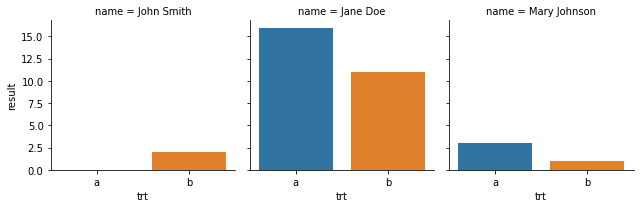

In [54]:
# Create a pair plot with seaborn 
# The reason for the sns when importing seaborn is that it is named after the 
#   person who created (Samuel Norman Seaborn) it using his initials.
sns.catplot(x='trt',       # The x variable.
            y='result',    # The y variable.
            col='name',    # The column variable.
            kind='bar',    # The kind of graph.
            data=tidy1,    # The dataframe where the data will come from.
            height=3);     # How tall you want your graph in inches.

#### Table 2 --> Tidy --> Table 2

Take table 2 (the transpose of table 1) and practice changing it into Tidy format and back again. You should not use the transpose operation anywhere in this code:

- Table 2 --> Tidy
- Tidy --> Table 2

In [55]:
import pandas as pd
import numpy as np

table1 = pd.DataFrame(
    [[np.nan, 2],
     [16,    11], 
     [3,      1]],
    index=['John Smith', 'Jane Doe', 'Mary Johnson'], 
    columns=['treatmenta', 'treatmentb'])

table2 = table1.T

table2

,John Smith,Jane Doe,Mary Johnson
treatmenta,NaN,16.0,3.0
treatmentb,2.0,11.0,1.0


In [56]:
# table2 -> tidy
# First need to get the column names as a list:
cols3 = table2.columns.to_list()
cols3

['John Smith', 'Jane Doe', 'Mary Johnson']

In [57]:
# Now need to get the index values as another list:
ind = table2.index.to_list()
ind

['treatmenta', 'treatmentb']

In [58]:
# For table2 convert the index into a column using the `reset_index` method:
table2 = table2.reset_index()
table2

,index,John Smith,Jane Doe,Mary Johnson
0,treatmenta,NaN,16.0,3.0
1,treatmentb,2.0,11.0,1.0


In [59]:
# Now convert the table from wide to tidy using the melt method:
tidy2 = table2.melt(id_vars='index', value_vars=cols3)
tidy2

# Having repeat values under the index column is common in tidy format.

,index,variable,value
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [60]:
# Rename the columns:
tidy2 = tidy2.rename(columns={'index':'TRT',
                              'variable':'Name',
                              'value':'Result'})
tidy2

,TRT,Name,Result
0,treatmenta,John Smith,NaN
1,treatmentb,John Smith,2.0
2,treatmenta,Jane Doe,16.0
3,treatmentb,Jane Doe,11.0
4,treatmenta,Mary Johnson,3.0
5,treatmentb,Mary Johnson,1.0


In [61]:
# Shorten the TRT values:
tidy2['TRT'] = tidy2['TRT'].str.replace('treatment', '')
tidy2

,TRT,Name,Result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [62]:
# tidy -> table2
# First need to call back my tidy2 table and review it:
tidy2

,TRT,Name,Result
0,a,John Smith,NaN
1,b,John Smith,2.0
2,a,Jane Doe,16.0
3,b,Jane Doe,11.0
4,a,Mary Johnson,3.0
5,b,Mary Johnson,1.0


In [64]:
# Need to do it all in reverse to turn it back to wide:
wide2 = tidy2.pivot_table(index='TRT',
                          columns='Name',
                          values='Result')

wide2

Name,Jane Doe,John Smith,Mary Johnson
TRT,,,
a,16.0,NaN,3.0
b,11.0,2.0,1.0


In [65]:
# Use .index to view what the index variable is named:
wide2.index

Index(['a', 'b'], dtype='object', name='TRT')

#### Using Seaborn
Load seaborn's flights dataset by running the cell below. Then create a pivot table showing the number of passengers by month and year. Use year for the index and month for the columns. You've done it right if you get 112 passengers for January 1949 and 432 passengers for December 1960.

In [0]:
import seaborn as sns

In [0]:
# Load the flights dataset:
flights = sns.load_dataset('flights')

In [67]:
# Check that the flights dataset loaded correctly:
flights

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121
...,...,...,...
139,1960,August,606
140,1960,September,508
141,1960,October,461
142,1960,November,390


In [71]:
# Flights Pivot Table:
# Create a pivot table to show the # of passengers by month and year:
flights_w = flights.pivot_table(index='year',
                                columns='month',
                                values='passengers')
flights_w

month,January,February,March,April,May,June,July,August,September,October,November,December
year,,,,,,,,,,,,
1949,112,118,132,129,121,135,148,148,136,119,104,118
1950,115,126,141,135,125,149,170,170,158,133,114,140
1951,145,150,178,163,172,178,199,199,184,162,146,166
1952,171,180,193,181,183,218,230,242,209,191,172,194
1953,196,196,236,235,229,243,264,272,237,211,180,201
1954,204,188,235,227,234,264,302,293,259,229,203,229
1955,242,233,267,269,270,315,364,347,312,274,237,278
1956,284,277,317,313,318,374,413,405,355,306,271,306
1957,315,301,356,348,355,422,465,467,404,347,305,336


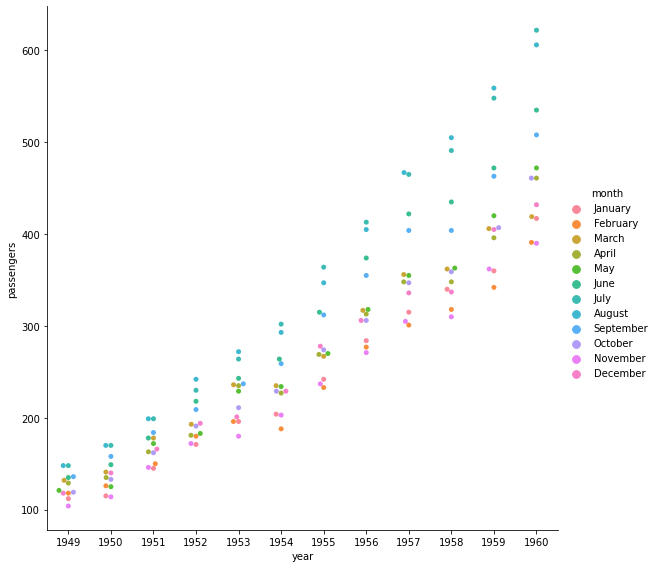

In [96]:
# Just because I want to see a visualization, I am creating a plot using sns:
sns.catplot(x='year', y='passengers', hue='month', kind='swarm',
            data=flights, height=8);

## Join Data Stretch Challenge

The [Instacart blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2) has a visualization of "**Popular products** purchased earliest in the day (green) and latest in the day (red)." 

The post says,

> "We can also see the time of day that users purchase specific products.

> Healthier snacks and staples tend to be purchased earlier in the day, whereas ice cream (especially Half Baked and The Tonight Dough) are far more popular when customers are ordering in the evening.

> **In fact, of the top 25 latest ordered products, the first 24 are ice cream! The last one, of course, is a frozen pizza.**"

Your challenge is to reproduce the list of the top 25 latest ordered popular products.

We'll define "popular products" as products with more than 2,900 orders.



In [0]:
##### YOUR CODE HERE #####

## Reshape Data Stretch Challenge

_Try whatever sounds most interesting to you!_

- Replicate more of Instacart's visualization showing "Hour of Day Ordered" vs "Percent of Orders by Product"
- Replicate parts of the other visualization from [Instacart's blog post](https://tech.instacart.com/3-million-instacart-orders-open-sourced-d40d29ead6f2), showing "Number of Purchases" vs "Percent Reorder Purchases"
- Get the most recent order for each user in Instacart's dataset. This is a useful baseline when [predicting a user's next order](https://www.kaggle.com/c/instacart-market-basket-analysis)
- Replicate parts of the blog post linked at the top of this notebook: [Modern Pandas, Part 5: Tidy Data](https://tomaugspurger.github.io/modern-5-tidy.html)

In [0]:
##### YOUR CODE HERE #####